In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")

In [3]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(274093, 786)

In [5]:
data.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [6]:
X = data.iloc[:,2:]
y = data.loc[:,"labels"]

In [7]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y.head()

0    6
1    D
2    f
3    /
4    F
Name: labels, dtype: object

In [9]:
X.shape

(274093, 784)

In [10]:
X.shape[1] ** 0.5

28.0

In [11]:
r_num = np.random.randint(0,len(data))

In [12]:
pic0 = np.asarray(X.iloc[r_num]).reshape(28,28)

true label is : \


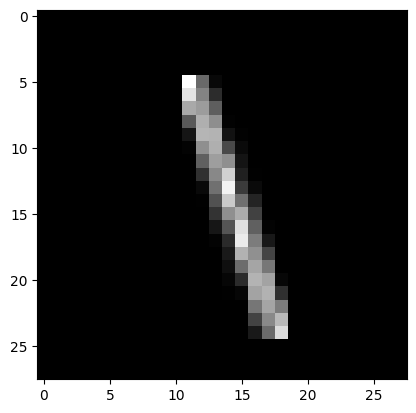

In [13]:
import matplotlib.pyplot as plt
plt.imshow(pic0,cmap="gray")
print("true label is :",y[r_num])
plt.show()

In [14]:
#number of classes
y.nunique()

94

In [15]:
# one hot encoding on labels
onh_enc= OneHotEncoder()
y = onh_enc.fit_transform(y.values.reshape(-1,1)).toarray()

In [16]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
reg = tf.keras.regularizers.L2(0.0001)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=784,activation="relu",input_shape=(784,),name="input_layer",kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.22))
model.add(tf.keras.layers.Dense(units=784,activation="relu",name="hidden_layer0",kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=784,activation="relu",name="hidden_layer1",kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.22))
model.add(tf.keras.layers.Dense(units=94,activation="softmax",name="output_layer",kernel_regularizer=reg))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 hidden_layer0 (Dense)       (None, 784)               615440    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 784)               615440    
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 94)                7

In [21]:
opt = tf.keras.optimizers.Adam(0.0001)
los = tf.keras.losses.CategoricalCrossentropy()
met = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=opt,loss=los,metrics=met)

In [22]:
history= model.fit(X_train,y_train,epochs=15,batch_size=300,validation_split=0.2,verbose=2)

Epoch 1/15
490/490 - 7s - loss: 14.0403 - categorical_accuracy: 0.2481 - val_loss: 1.5991 - val_categorical_accuracy: 0.6888 - 7s/epoch - 15ms/step
Epoch 2/15
490/490 - 2s - loss: 3.1139 - categorical_accuracy: 0.4738 - val_loss: 1.2752 - val_categorical_accuracy: 0.7559 - 2s/epoch - 4ms/step
Epoch 3/15
490/490 - 2s - loss: 2.2178 - categorical_accuracy: 0.5805 - val_loss: 1.1108 - val_categorical_accuracy: 0.7864 - 2s/epoch - 4ms/step
Epoch 4/15
490/490 - 2s - loss: 1.8073 - categorical_accuracy: 0.6409 - val_loss: 1.0083 - val_categorical_accuracy: 0.8058 - 2s/epoch - 4ms/step
Epoch 5/15
490/490 - 2s - loss: 1.5557 - categorical_accuracy: 0.6838 - val_loss: 0.9358 - val_categorical_accuracy: 0.8226 - 2s/epoch - 4ms/step
Epoch 6/15
490/490 - 2s - loss: 1.3840 - categorical_accuracy: 0.7134 - val_loss: 0.8819 - val_categorical_accuracy: 0.8311 - 2s/epoch - 4ms/step
Epoch 7/15
490/490 - 2s - loss: 1.2605 - categorical_accuracy: 0.7355 - val_loss: 0.8378 - val_categorical_accuracy: 0.836

In [23]:
import json


with open('re100.json', 'w') as f:
    json.dump(history.history,f)

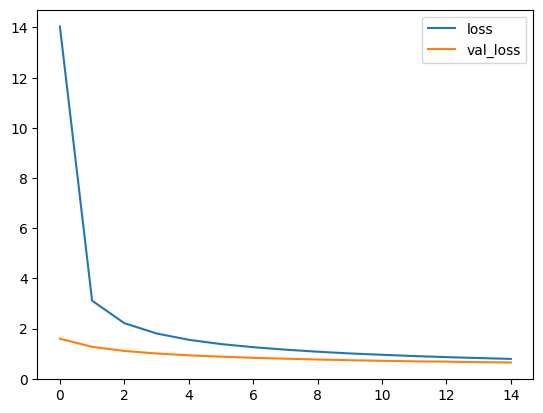

In [24]:
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "val_loss")
plt.legend()
plt.show()